# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.18 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [2]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
for i in range(5):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291


When finished, you can close the environment.

### 4. Training A Smart Game Competition

set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

[Refresh Jupyter Notebook](https://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython)

In [10]:
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
import time
%matplotlib inline
%load_ext autoreload 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
%autoreload 1
#%aimport ddpg_agent
%aimport model

from ddpg_agent import Agent

env_info = env.reset(train_mode=True)[brain_name] # Create simulation environment

num_agents = len(env_info.agents)
action_size = brain.vector_action_space_size
states = env_info.vector_observations
state_size = states.shape[1]

agents_list = []
num_agents = 2

agent = Agent(state_size=state_size, action_size=action_size,num_agents=num_agents, random_seed=50)

## Note: _Adapting ddpg_

To adapt ddpg to train multiple agents, and as each agent receives its own, local observation, we can simultaneously train both agents through self-play. In our case, each agent used the same actor network to select actions, and the experience is to be added to a shared replay buffer.

In [12]:
def smart_agent_ddpg(n_episodes=10000, max_t=1000):
    
    """Deep Deterministic Policy Gradient (DDPG)
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        
    """
    
    scores_list = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)       # last 100 scores
    
    #agent.reset() 

    for i_episode in range(1, n_episodes+1):
        
        
        env_info = env.reset(train_mode=True)[brain_name]
        #state = env_info.vector_observations[0] # current state
        states = env_info.vector_observations    # get the current state (for each agent)
        
        scores = np.zeros(num_agents)                          # initialize the score (for each agent)
        
        agent.reset()
        
        #for t in range(max_t):
        while True:
            
            actions = agent.act(states, add_noise = True)    # Predict the best action for the current state.(for each agent)
            actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
            
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished

            
            # current state, action, reward, new state are stored in the experience replay
            agent.step(states, actions, rewards, next_states, dones)
            
            scores += rewards                                  # update the score (for each agent)
            states = next_states                               # roll over states to next time step
            
            if np.any(dones):                                  # exit loop if episode finished
                break
            
        scores_window.append(np.max(scores))            # save max attained scores from all agents
        scores_list.append(np.mean(scores))              # save average attained scores from all agents
        
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        
        if i_episode % 100 == 0: #requirement
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            #save the model
            
        if np.mean(scores_window)>=0.5:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            
            torch.save(agent.actor_local.state_dict(), 'actor_mdl.pth')
            torch.save(agent.critic_local.state_dict(), 'critic_mdl.pth')
            
            break
            
    return scores_list

In [13]:
t1 = time.time()
scores_list = smart_agent_ddpg()
t2 = time.time()

time_to_converge = round((t2-t1)/60.0,2)
print("total time [min]: ",time_to_converge)

Episode 100	Average Score: 0.00
Episode 200	Average Score: 0.00
Episode 300	Average Score: 0.00
Episode 400	Average Score: 0.00
Episode 500	Average Score: 0.00
Episode 600	Average Score: 0.00
Episode 700	Average Score: 0.00
Episode 800	Average Score: 0.00
Episode 900	Average Score: 0.00
Episode 1000	Average Score: 0.00
Episode 1100	Average Score: 0.00
Episode 1200	Average Score: 0.00
Episode 1300	Average Score: 0.00
Episode 1400	Average Score: 0.00
Episode 1500	Average Score: 0.00
Episode 1600	Average Score: 0.00
Episode 1700	Average Score: 0.01
Episode 1800	Average Score: 0.02
Episode 1900	Average Score: 0.03
Episode 2000	Average Score: 0.05
Episode 2100	Average Score: 0.06
Episode 2200	Average Score: 0.07
Episode 2300	Average Score: 0.09
Episode 2400	Average Score: 0.09
Episode 2500	Average Score: 0.07
Episode 2600	Average Score: 0.10
Episode 2700	Average Score: 0.09
Episode 2800	Average Score: 0.10
Episode 2900	Average Score: 0.10
Episode 3000	Average Score: 0.10
Episode 3100	Averag

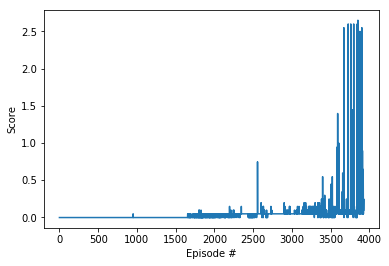

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores_list)), scores_list)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [ ]:
env.close()